### Facebook Comment Volume Dataset Data
- A dataset with various facebook metrics is provided
- The aim is to conduct basic EDA on the data
- Create a linear regression model to predict the number of comments in the next H hours
- Measure the goodness of the model
- Measure the performance of the model

### Importing Libraries and Data

In [11]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
# Adding setting to display all outputs from a code block
InteractiveShell.ast_node_interactivity = "all"

### Loading Data And Assigning Column Names
Note: We will be dropping the derived columns 5-29

In [12]:
train=pd.read_csv('./Features_Variant_1.csv',header=None)
# Dropping Columns 5-29 and adding column names
train.drop(train.columns[5:30],axis=1,inplace=True)

columns=['Page Popularity Likes', 'Page Checkins', 'Page talking About', 'Page Category', 'CC1', 'CC2', 'CC3', 'CC4','CC5', 'Base Time', 'Post Length', 'Post Share Count', 'Post Promotion Status', 'H Local']
for i in ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']:
    columns.append('Post Publish '+i)
for i in ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']:
    columns.append('Base Date Time '+i)
columns.append('Target Variable')
train.columns=columns

### I. Exploratory Data Analysis

In [13]:
# Basic stats and structure of data
print('Total Number of Elements: ', train.size)
print('Rows x Columns: ',train.shape)
print("Columns: ",train.columns)
train.head()
train.info()

Total Number of Elements:  1187521
Rows x Columns:  (40949, 29)
Columns:  Index(['Page Popularity Likes', 'Page Checkins', 'Page talking About',
       'Page Category', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base Time',
       'Post Length', 'Post Share Count', 'Post Promotion Status', 'H Local',
       'Post Publish Sunday', 'Post Publish Monday', 'Post Publish Tuesday',
       'Post Publish Wednesday', 'Post Publish Thursday',
       'Post Publish Friday', 'Post Publish Saturday', 'Base Date Time Sunday',
       'Base Date Time Monday', 'Base Date Time Tuesday',
       'Base Date Time Wednesday', 'Base Date Time Thursday',
       'Base Date Time Friday', 'Base Date Time Saturday', 'Target Variable'],
      dtype='object')


,Page Popularity Likes,Page Checkins,Page talking About,Page Category,CC1,CC2,CC3,CC4,CC5,Base Time,...,Post Publish Friday,Post Publish Saturday,Base Date Time Sunday,Base Date Time Monday,Base Date Time Tuesday,Base Date Time Wednesday,Base Date Time Thursday,Base Date Time Friday,Base Date Time Saturday,Target Variable
0,634995,0,463,1,0.0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,0,0,0,0,10,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,0,3,7,-3,62,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,0,0,1,0,58,...,0,0,0,0,0,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Page Popularity Likes     40949 non-null  int64  
 1   Page Checkins             40949 non-null  int64  
 2   Page talking About        40949 non-null  int64  
 3   Page Category             40949 non-null  int64  
 4   CC1                       40949 non-null  float64
 5   CC2                       40949 non-null  int64  
 6   CC3                       40949 non-null  int64  
 7   CC4                       40949 non-null  int64  
 8   CC5                       40949 non-null  int64  
 9   Base Time                 40949 non-null  int64  
 10  Post Length               40949 non-null  int64  
 11  Post Share Count          40949 non-null  int64  
 12  Post Promotion Status     40949 non-null  int64  
 13  H Local                   40949 non-null  int64  
 14  Post P

#### Checking For Missing Values
We'll see that the data is complete without any missing values. This can be visually observed as well from the heatamp. So no missing value treatment i.e columns need to be dropped or values imputed. 

In [14]:
# Shows number of missing values in each column
train.isnull().sum()
# Shows Only Columsn with Missing Values
train.columns[train.isnull().any()]

Page Popularity Likes       0
Page Checkins               0
Page talking About          0
Page Category               0
CC1                         0
CC2                         0
CC3                         0
CC4                         0
CC5                         0
Base Time                   0
Post Length                 0
Post Share Count            0
Post Promotion Status       0
H Local                     0
Post Publish Sunday         0
Post Publish Monday         0
Post Publish Tuesday        0
Post Publish Wednesday      0
Post Publish Thursday       0
Post Publish Friday         0
Post Publish Saturday       0
Base Date Time Sunday       0
Base Date Time Monday       0
Base Date Time Tuesday      0
Base Date Time Wednesday    0
Base Date Time Thursday     0
Base Date Time Friday       0
Base Date Time Saturday     0
Target Variable             0
dtype: int64

Index([], dtype='object')

<AxesSubplot:>

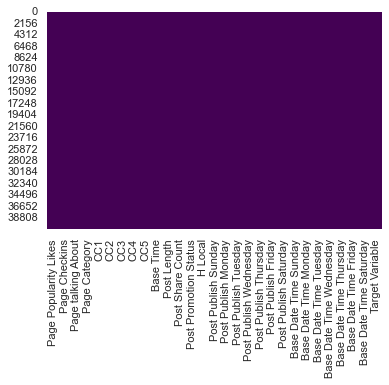

In [15]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

#### Linear Relationships In The Data

<AxesSubplot:>

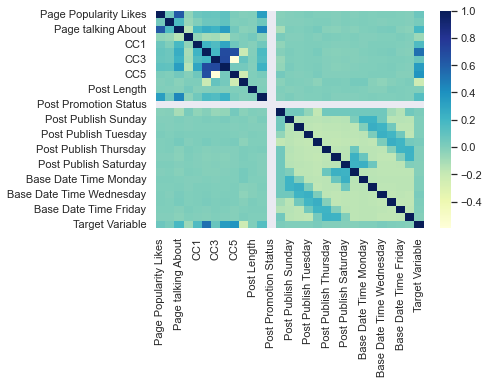

In [16]:
# print(train.corr())
sns.set(font_scale=1.0)
sns.heatmap(train.corr(),cbar=True,annot=False,cmap='YlGnBu')


Based on the above plot we observe that there is multicollinearity between some variable as well as some variables having weak to strong correlations with the target variables.
following correlations:  

**Positive Correlation**  
Page Popularity Likes - Page Talking about, Post Promotion Status  
Page Talking About - CC1, CC2, CC3, CC4, CC5, Post Promotion Status, Target Variable  
CC1 - CC2, CC3, CC4, Target Variable  
CC2 - CC1, {CC3, CC4, CC5, Target Variable } (Strong Correlation)  
CC3 - CC4  
CC4 - Target Variable  
Post Share Count -  Page Popularity, Page Talking about  
Target Variable- CC1, CC2, CC4, CC5, Page Talking About


**Negative Correlation**  
Base Time- Target Variable

#### Key Observations
1. CC2 has a strong linear correlation with target variable
2. Base Time has a strong negative correlation with target variable

### Univariate Analysis For All Features

Text(0.5, 0, 'Page Popularity Likes')

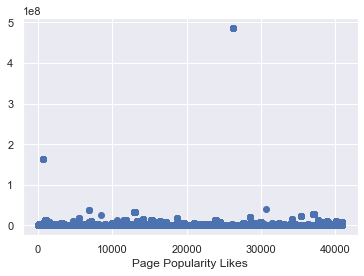

Text(0.5, 0, 'Page Checkins')

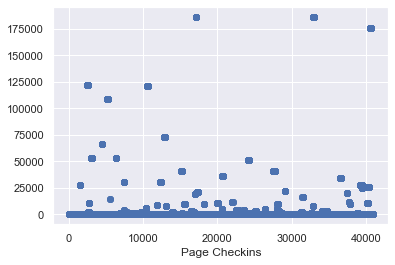

Text(0.5, 0, 'Page talking About')

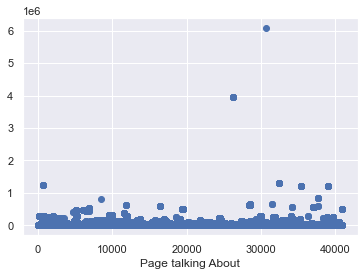

Text(0.5, 0, 'Page Category')

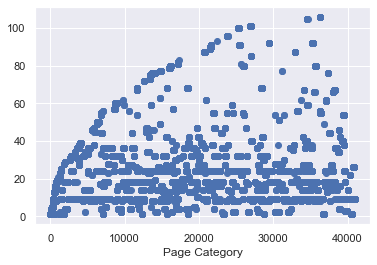

Text(0.5, 0, 'CC1')

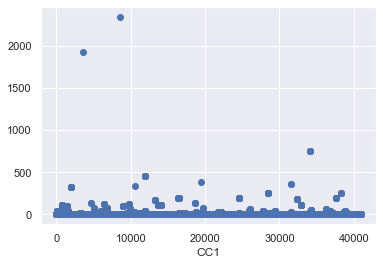

Text(0.5, 0, 'CC2')

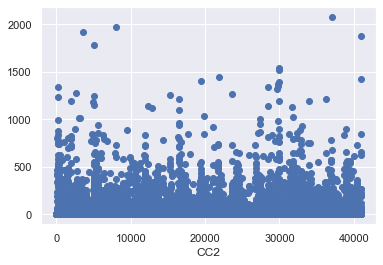

Text(0.5, 0, 'CC3')

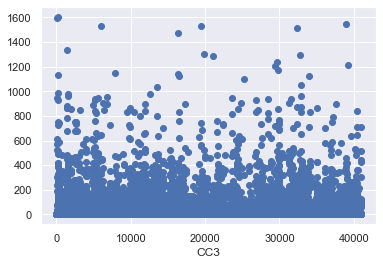

Text(0.5, 0, 'CC4')

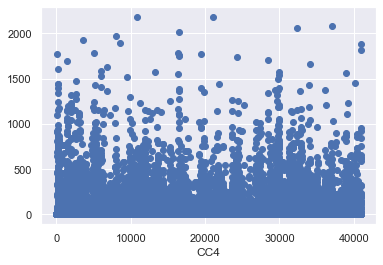

Text(0.5, 0, 'CC5')

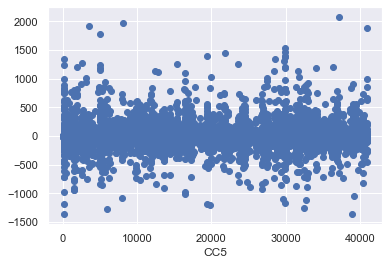

Text(0.5, 0, 'Base Time')

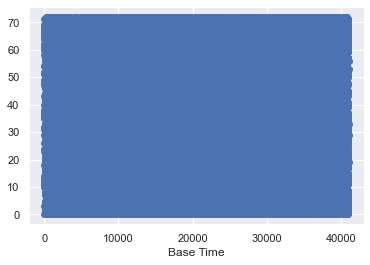

Text(0.5, 0, 'Post Length')

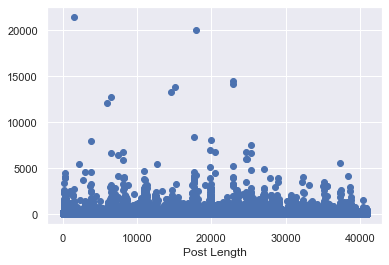

Text(0.5, 0, 'Post Share Count')

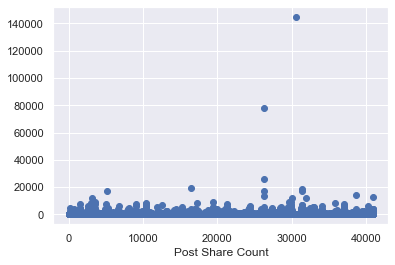

Text(0.5, 0, 'Post Promotion Status')

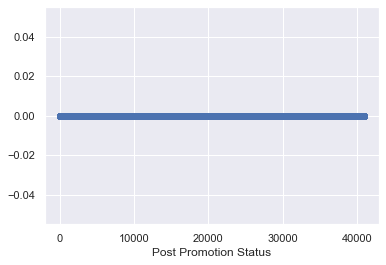

Text(0.5, 0, 'H Local')

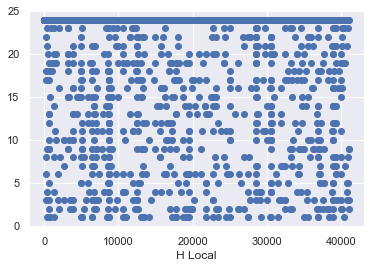

Text(0.5, 0, 'Post Publish Sunday')

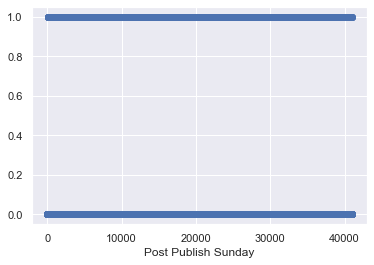

Text(0.5, 0, 'Post Publish Monday')

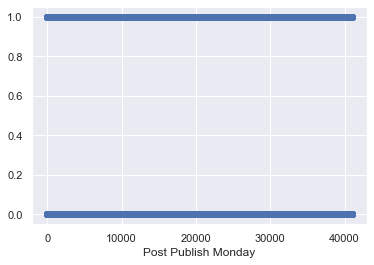

Text(0.5, 0, 'Post Publish Tuesday')

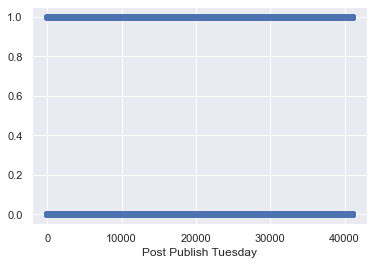

Text(0.5, 0, 'Post Publish Wednesday')

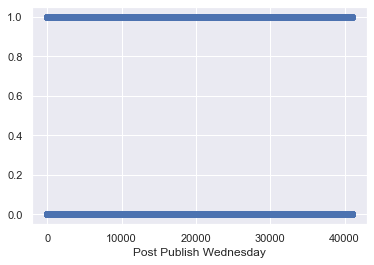

Text(0.5, 0, 'Post Publish Thursday')

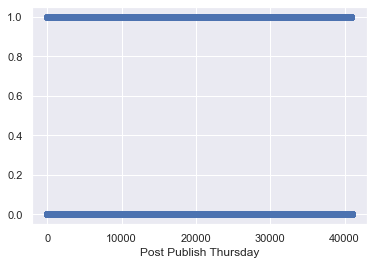

Text(0.5, 0, 'Post Publish Friday')

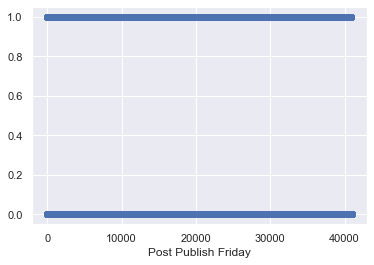

Text(0.5, 0, 'Post Publish Saturday')

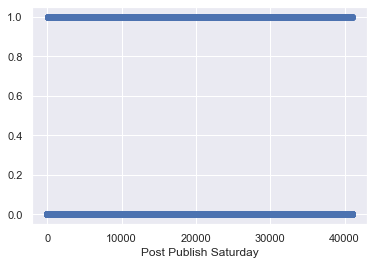

Text(0.5, 0, 'Base Date Time Sunday')

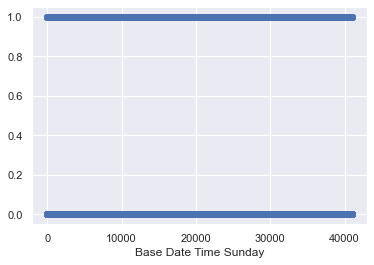

Text(0.5, 0, 'Base Date Time Monday')

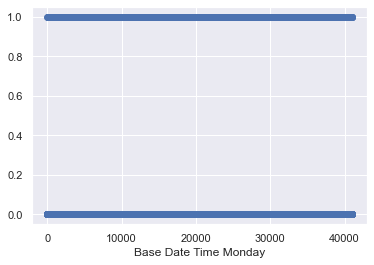

Text(0.5, 0, 'Base Date Time Tuesday')

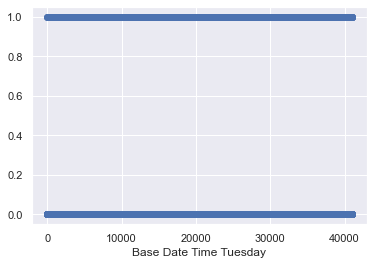

Text(0.5, 0, 'Base Date Time Wednesday')

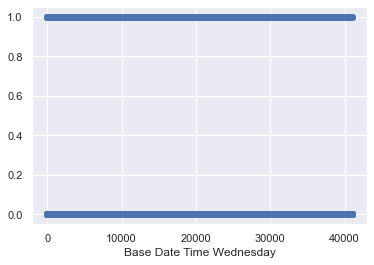

Text(0.5, 0, 'Base Date Time Thursday')

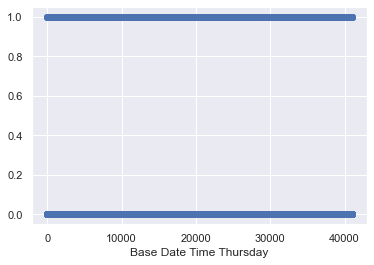

Text(0.5, 0, 'Base Date Time Friday')

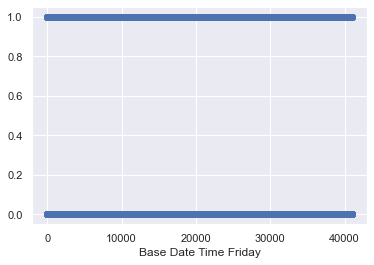

Text(0.5, 0, 'Base Date Time Saturday')

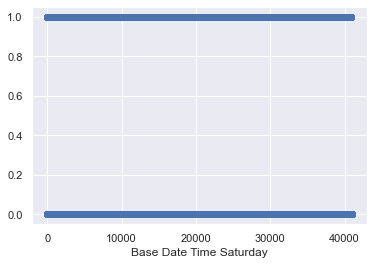

Text(0.5, 0, 'Target Variable')

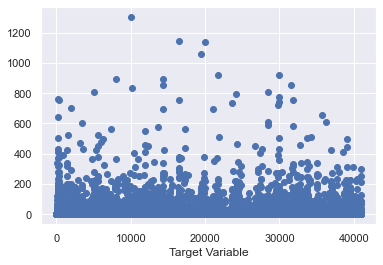

In [24]:
for i in range(len(columns)):
    plt.scatter(train.index,train[columns[i]])
    plt.xlabel(columns[i])
    plt.show()

(array([4.0937e+04, 0.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([3.60000000e+01, 4.86972621e+07, 9.73944882e+07, 1.46091714e+08,
        1.94788940e+08, 2.43486166e+08, 2.92183393e+08, 3.40880619e+08,
        3.89577845e+08, 4.38275071e+08, 4.86972297e+08]),
 <BarContainer object of 10 artists>)

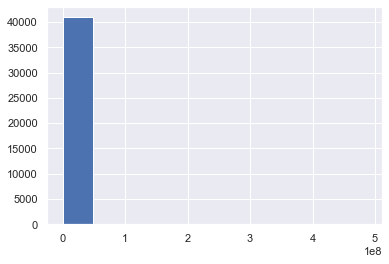

In [23]:
for i in range(len(columns)):
    plt.hist(train[columns[0]])
    plt.xlabel(columns[0])

### Relationship Between CC2 and Target Variable

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'CC2')

Text(0, 0.5, 'Target Variable')

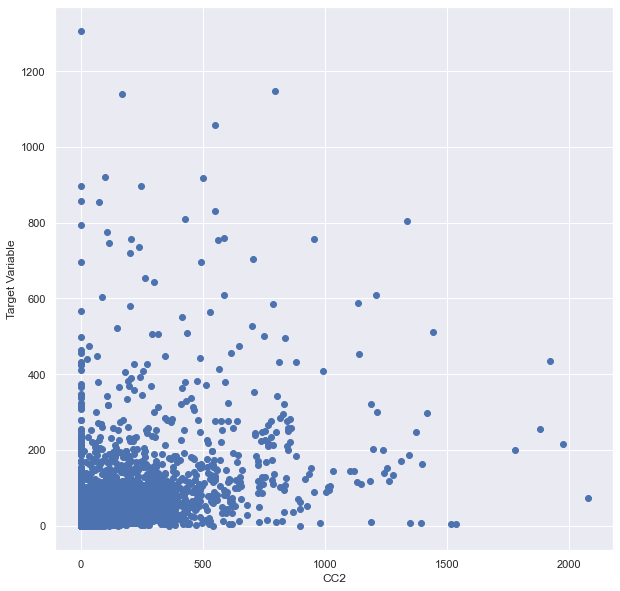

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x='CC2',y='Target Variable',data=train)
plt.xlabel('CC2')
plt.ylabel('Target Variable')

The plot does not seem to show a very evident relationship

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Base Time')

Text(0, 0.5, 'Target Variable')

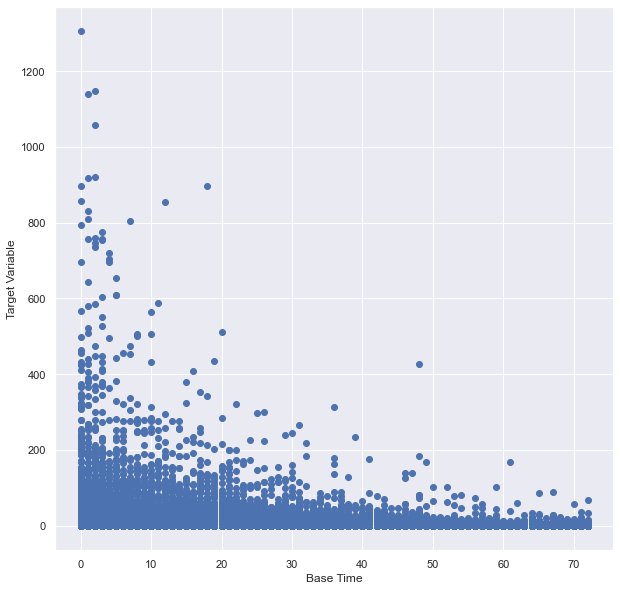

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x='Base Time',y='Target Variable',data=train)
plt.xlabel('Base Time')
plt.ylabel('Target Variable')

From this graph we see that the higher value for target variable is inversely realted to base time

array([[<AxesSubplot:title={'center':'Page Popularity Likes'}>,
        <AxesSubplot:title={'center':'Page Checkins'}>,
        <AxesSubplot:title={'center':'Page talking About'}>,
        <AxesSubplot:title={'center':'Page Category'}>,
        <AxesSubplot:title={'center':'CC1'}>],
       [<AxesSubplot:title={'center':'CC2'}>,
        <AxesSubplot:title={'center':'CC3'}>,
        <AxesSubplot:title={'center':'CC4'}>,
        <AxesSubplot:title={'center':'CC5'}>,
        <AxesSubplot:title={'center':'Base Time'}>],
       [<AxesSubplot:title={'center':'Post Length'}>,
        <AxesSubplot:title={'center':'Post Share Count'}>,
        <AxesSubplot:title={'center':'Post Promotion Status'}>,
        <AxesSubplot:title={'center':'H Local'}>,
        <AxesSubplot:title={'center':'Post Publish Sunday'}>],
       [<AxesSubplot:title={'center':'Post Publish Monday'}>,
        <AxesSubplot:title={'center':'Post Publish Tuesday'}>,
        <AxesSubplot:title={'center':'Post Publish Wednesday'}>,

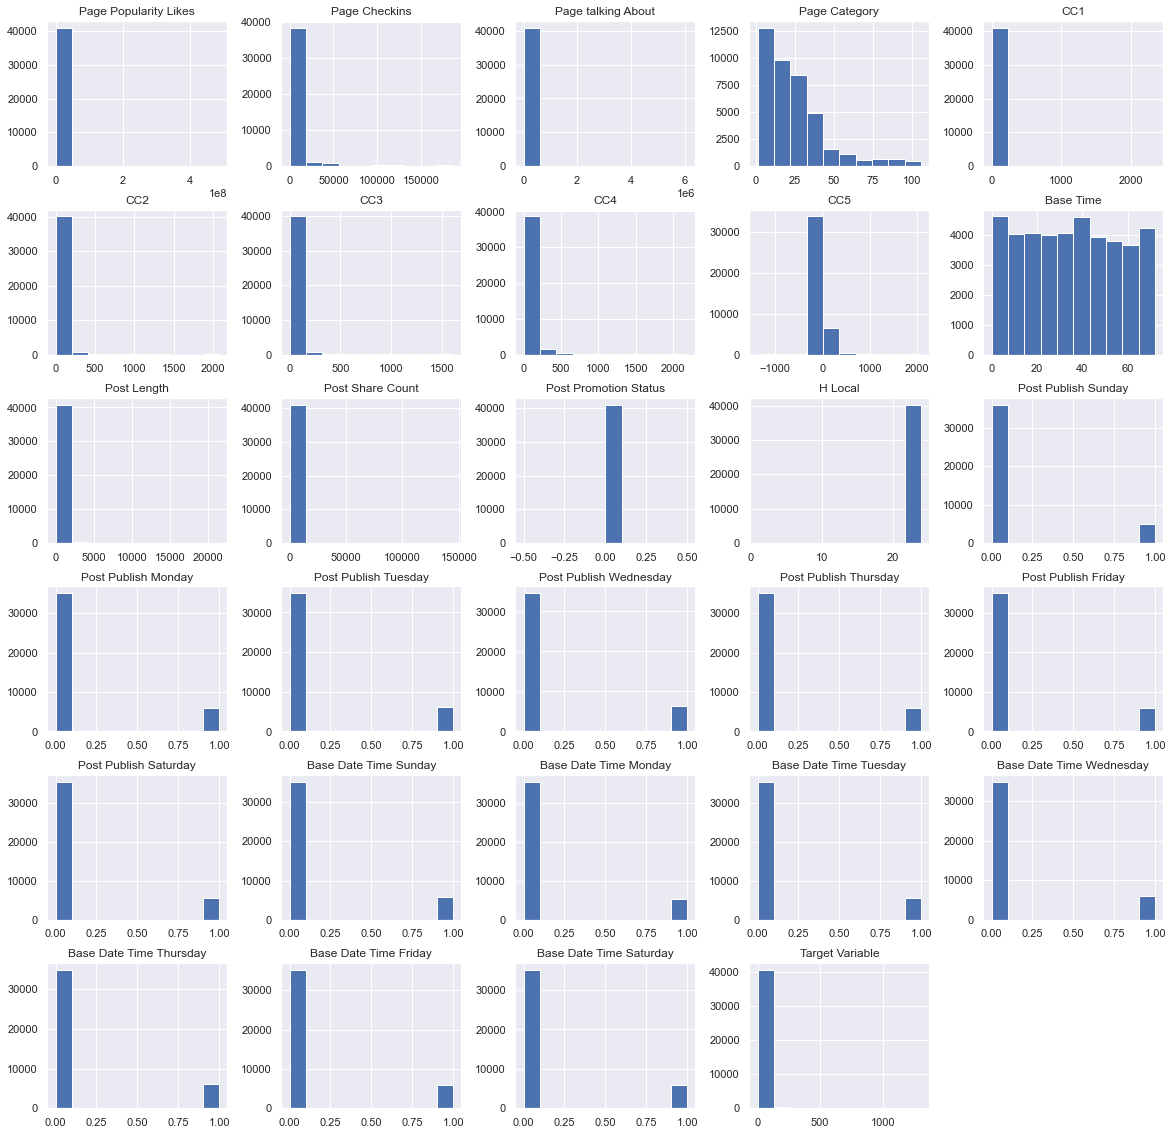

In [20]:
train.hist(figsize=(20,20))
plt.show()

### III. Univariate Analysis